Construindo um grafo automaticamente
====================================



## Introdução



Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



## Importações



In [1]:
from funcoes import plota_grafo

## Código e discussão



### Primeiros passos



A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [2]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

Vamos testar nossa classe!



In [3]:
x1= Valor(60)
print(x1)
print(x1.data)

Valor(data=60)
60


### Os dunders `__add__` e `__mul__`



Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



In [4]:
a = Valor(10)
b = Valor(5)

In [5]:
print(a + b)

TypeError: unsupported operand type(s) for +: 'Valor' and 'Valor'

In [6]:
print(a * b)

TypeError: unsupported operand type(s) for *: 'Valor' and 'Valor'

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



In [7]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



In [8]:
a = Valor(10)
b = Valor(5)

In [9]:
print(a + b)

Valor(data=15)


In [10]:
print(a * b)

Valor(data=50)


### Registrando os progenitores



Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [11]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

Vamos testar!



In [12]:
a= Valor(5)
b= Valor(10)

c= a+b
d= c+a
print(c)
print(d)
print(d.progenitor)

Valor(data=15)
Valor(data=20)
(Valor(data=15), Valor(data=5))


### Registrando o operador mãe



Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [13]:
# Armazenando valor do operador mãe
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [14]:
a= Valor(5)
b= Valor(10)

c= a+b
d= c+a
print(c)
print(d)
print(d.progenitor)
print(d.operador_mae)

Valor(data=15)
Valor(data=20)
(Valor(data=15), Valor(data=5))
+


### Plotando o primeiro grafo



Vamos plotar nosso primeiro grafo!



In [15]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

grafo= plota_grafo(e)
print(grafo)


digraph {
	graph [rankdir=LR]
	2971483730992 [label="{ data -3.0000 }" shape=record]
	2971483733632 [label="{ data 2.0000 }" shape=record]
	2971483730128 [label="{ data 10.0000 }" shape=record]
	2971482189056 [label="{ data -6.0000 }" shape=record]
	"2971482189056*" [label="*"]
	"2971482189056*" -> 2971482189056
	2971483730752 [label="{ data 4.0000 }" shape=record]
	"2971483730752+" [label="+"]
	"2971483730752+" -> 2971483730752
	2971483730128 -> "2971483730752+"
	2971482189056 -> "2971483730752+"
	2971483733632 -> "2971482189056*"
	2971483730992 -> "2971482189056*"
}



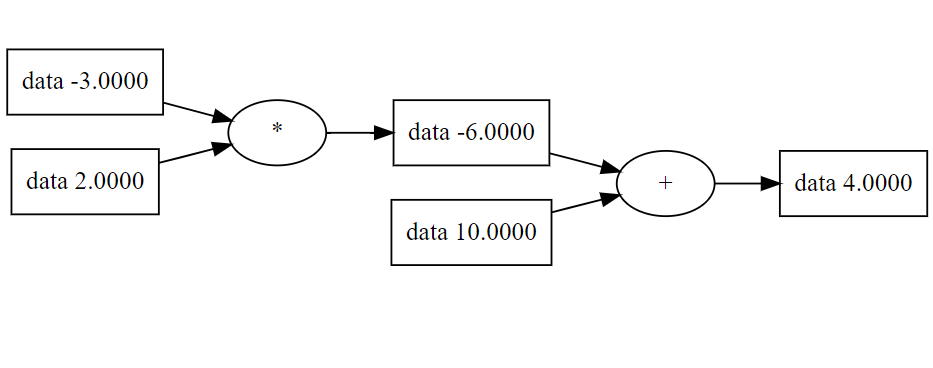

### Registrando o rótulo



Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [16]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [17]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

grafo= plota_grafo(e)
print(grafo)

digraph {
	graph [rankdir=LR]
	2971483713696 [label="{ d | data -6.0000 }" shape=record]
	"2971483713696*" [label="*"]
	"2971483713696*" -> 2971483713696
	2971483714320 [label="{ e | data 4.0000 }" shape=record]
	"2971483714320+" [label="+"]
	"2971483714320+" -> 2971483714320
	2971483714368 [label="{ c | data 10.0000 }" shape=record]
	2971483717056 [label="{ b | data -3.0000 }" shape=record]
	2971483714512 [label="{ a | data 2.0000 }" shape=record]
	2971483717056 -> "2971483713696*"
	2971483714368 -> "2971483714320+"
	2971483714512 -> "2971483713696*"
	2971483713696 -> "2971483714320+"
}



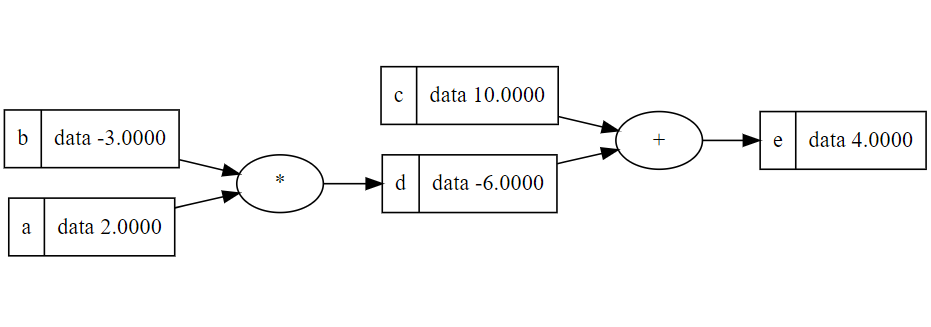

### Refazendo o grafo que fizemos na aula anterior



Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



In [20]:
x1= Valor(60, rotulo= "x1")
x2= Valor(24, rotulo= "x2")
w1= Valor(10, rotulo= "w1")
w2= Valor(5, rotulo= "w2")
w3= Valor(2, rotulo= "w3")
b= Valor(7, rotulo= "b")

s1= x1*w1
s1.rotulo= "s1"

s2= x2*w2
s2.rotulo= "s2"

n= s1+s2
n.rotulo= "n"

k= n+b
k.rotulo= "k"

y= k* w3
y.rotulo="y"

grafo= plota_grafo(y)
print(grafo)

digraph {
	graph [rankdir=LR]
	2971483714560 [label="{ w1 | data 10.0000 }" shape=record]
	2971483713600 [label="{ w2 | data 5.0000 }" shape=record]
	2971483732048 [label="{ n | data 720.0000 }" shape=record]
	"2971483732048+" [label="+"]
	"2971483732048+" -> 2971483732048
	2971483732576 [label="{ k | data 727.0000 }" shape=record]
	"2971483732576+" [label="+"]
	"2971483732576+" -> 2971483732576
	2971483730032 [label="{ s2 | data 120.0000 }" shape=record]
	"2971483730032*" [label="*"]
	"2971483730032*" -> 2971483730032
	2971483716240 [label="{ w3 | data 2.0000 }" shape=record]
	2971483730080 [label="{ b | data 7.0000 }" shape=record]
	2971483715808 [label="{ x2 | data 24.0000 }" shape=record]
	2971483714848 [label="{ x1 | data 60.0000 }" shape=record]
	2971483733344 [label="{ y | data 1454.0000 }" shape=record]
	"2971483733344*" [label="*"]
	"2971483733344*" -> 2971483733344
	2971483732384 [label="{ s1 | data 600.0000 }" shape=record]
	"2971483732384*" [label="*"]
	"2971483732384*" -> 

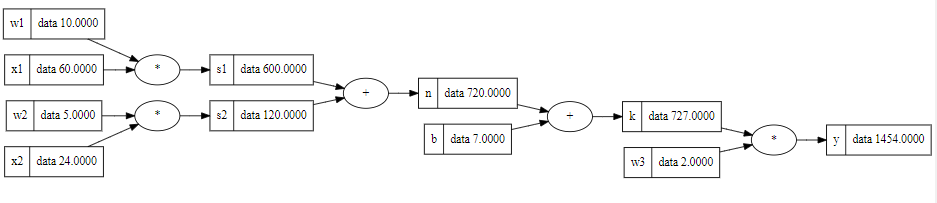

### TESTE (a pedido do professor)

In [18]:
try:
    import graphviz
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install graphviz

## Conclusão



Como foi antecipado nas conclusões do último experimento, as `classes` de fato nos ajudaram a representar redes neurais por maio de grafos.

Na primeira aula sobre Redes Neurais, nós desenhamos à mão o `backpropagation` de uma rede neural, o que demorou muito tempo. Com esse código, no entanto, fica muito mais rápido criarmos grafos, embora eles ainda estajam incompletos. Afinal, esses grafos contem apenas o valor de cada neurônio artificial e indica quais são seus "progenitores". Falta, ainda, o mais importante: o `Gradiente Local do Parâmetro`. Para calculá-lo, será necessário definir o conceito de derivadas e derivadas parciais, o que faremos nas próximas aulas!

## Playground

